<a href="https://colab.research.google.com/github/sanvasu/Credit-EDA-Credit-Score-Calculation-with-Python/blob/main/Casestudy_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import re

In [ ]:
df = pd.read_csv("Credit_score.csv")

In [ ]:
df.shape

(100000, 27)

In [ ]:
replacing_columns = df[['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']]
replacing_columns.replace('-', '', regex=True,inplace=True)
replacing_columns.replace('_', '', regex=True,inplace=True)
df[['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']] = replacing_columns

<ipython-input-215-d526669641d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacing_columns.replace('-', '', regex=True,inplace=True)
<ipython-input-215-d526669641d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacing_columns.replace('_', '', regex=True,inplace=True)


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.629163
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.209863
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.451310
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [ ]:
 df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [ ]:
df.isna().sum()*100/len(df)

,0
ID,0.000
Customer_ID,0.000
Month,0.000
Name,9.985
Age,0.000
SSN,0.000
Occupation,0.000
Annual_Income,0.000
Monthly_Inhand_Salary,15.002
Num_Bank_Accounts,0.000


In [ ]:
cat_columns = df.select_dtypes(include='object').columns
cat_columns = list(cat_columns)
cat_columns

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour']

In [ ]:
num_columns = df.select_dtypes(exclude='object').columns
num_columns = list(num_columns)
num_columns

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Monthly_Balance']

In [ ]:
df['Name'].fillna('Unknown',inplace=True)
df['Monthly_Inhand_Salary'].fillna(0,inplace=True)
df['Type_of_Loan'].fillna('Not Specified',inplace=True)
df['Num_Credit_Inquiries'].fillna(0,inplace=True)
df['Amount_invested_monthly'].fillna(0,inplace=True)
df['Num_of_Delayed_Payment'].fillna(0,inplace=True)
df['Monthly_Balance'].fillna(0,inplace=True)
df['Credit_Mix'].replace('_','NA',inplace=True)
df['Amount_invested_monthly'].replace('_','',inplace=True)

In [ ]:
df['Credit_History_Age'].fillna('0 Years and 0 Months',inplace=True)

In [ ]:
 df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [ ]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [ ]:
df['Age'] = df['Age'].astype(int)
df['Credit_History_Age'] = df['Credit_History_Age'].astype('string')

In [ ]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,int64
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


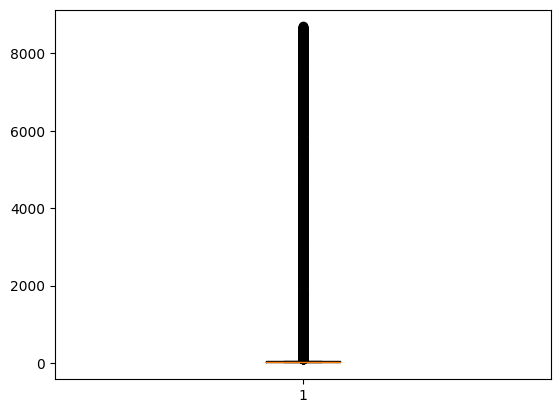

<Figure size 500x300 with 0 Axes>

In [ ]:
plt.boxplot(df['Age'])
fig = plt.figure(figsize =(5, 3))
plt.show()

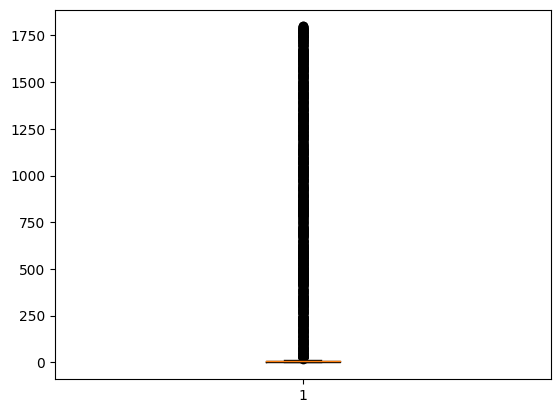

<Figure size 500x300 with 0 Axes>

In [ ]:
plt.boxplot(df['Num_Bank_Accounts'])
fig = plt.figure(figsize =(5, 3))
plt.show()

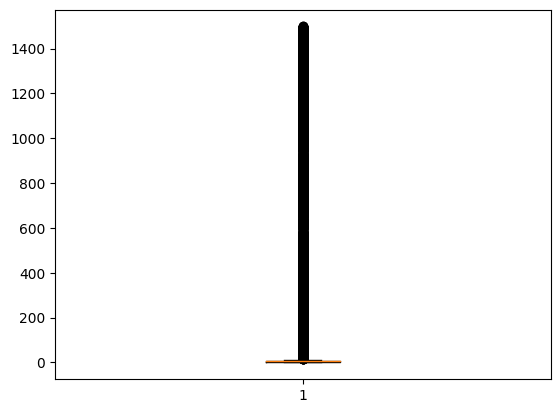

<Figure size 500x300 with 0 Axes>

In [ ]:
plt.boxplot(df['Num_Credit_Card'])
fig = plt.figure(figsize =(5, 3))
plt.show()

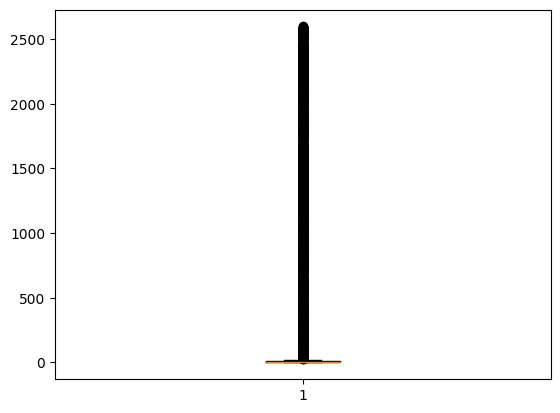

<Figure size 500x300 with 0 Axes>

In [ ]:
plt.boxplot(df['Num_Credit_Inquiries'])
fig = plt.figure(figsize =(5, 3))
plt.show()

In [ ]:
def get_mode(series):
    return series.mode().iloc[0]

In [ ]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(get_mode)
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(get_mode)
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(get_mode)
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(get_mode)

In [ ]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.replace(0, x.max()))

In [ ]:
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.replace(0, x.mean()))

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age_in_Years,loan_vs_income_ratio,Debt_to_Income_Ratio,Total_Monthly_Payments,Avg_Monthly_Balance,saving_ratio,Total_Payments,Payment_History,Payment_Behaviour_Encoded,credit_score_1
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,22.083333,0.000209,0.042376,987.057215,26.041174,0.004207,11,0.363636,4.0,306.047279
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,0.000000,0.000209,0.042376,903.462437,23.719097,0.006188,11,1.000000,3.0,303.002963
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,22.250000,0.000209,0.042376,1043.204538,27.600822,0.004274,11,0.363636,2.0,306.090455
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,22.333333,0.000209,0.042376,719.928878,18.620942,0.010435,11,0.636364,1.0,305.211565
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,22.416667,0.000209,0.042376,1074.042642,28.457436,0.002167,11,1.000000,5.0,306.491888


In [ ]:
df.shape

(100000, 30)

In [ ]:
ssn_pattern = re.compile(r'^\d{3}-\d{2}-\d{4}$')
df['SSN'] = df['SSN'].apply(lambda x: x if ssn_pattern.match(str(x)) else '000-00-0000')

In [ ]:
payment_behaviour_patten  = r'^[A-Za-z]+_[A-Za-z]+_[A-Za-z]+_[A-Za-z]+_[A-Za-z]+$'
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(lambda x: x if re.match(payment_behaviour_patten, str(x)) else 'Not Specified')

In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)

In [ ]:
getvalues = df['Credit_History_Age'].values
values_list = getvalues.tolist()

In [ ]:
grouped_values = df['Credit_History_Age'].unique()

In [ ]:
print(grouped_values)

['22 Years and 1 Months' '0 Years and 0 Months' '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years and 5 Months' '22 Years and 6 Months'
 '22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 9 Months' '26 Years and 10 Months' '26 Years and 11 Months'
 '27 Years and 0 Months' '27 Years and 1 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '17 Years and 11 Months'
 '18 Years and 1 Months' '18 Years and 2 Months' '18 Years and 3 Months'
 '18 Years and 4 Months' '17 Years and 3 Months' '17 Years and 4 Months'
 '17 Years and 5 Months' '17 Years and 6 Months' '17 Years and 7 Months'
 '17 Years and 8 Months' '30 Years and 8 Months' '30 Years and 9 Months'
 '30 Years and 10 Months' '30 Years and 11 Months' '31 Years and 0 Months'
 '31 Years and 1 Months' '31 Years and 2 Months' '31 Years and 3 Months'
 '32 Years and 0 Months' '32 Years and 2 Months' '32 Years and 3 Months'
 '32 Years and 5 Months' '32 Years and 6 Month

In [ ]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,int64
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [ ]:
credit_history = df['Credit_History_Age']
years = credit_history.str.extract('(\d+) Years').astype(int)
months = credit_history.str.extract('(\d+) Months').astype(int)
credit_history = years + (months / 12)

In [ ]:
df['Credit_History_Age_in_Years'] = credit_history

In [ ]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,int64
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_in_Years
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NA,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,22.083333
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,0 Years and 0 Months,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.629163,0.000000
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.209863,22.250000
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.451310,22.333333
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,22.416667


In [ ]:
df.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_History_Age_in_Years
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.274560,4199.890282,5.367520,5.532720,72.466040,21.068780,5.672160,32.285173,1403.118217,402.160672,16.768455
std,10.764438,3188.480516,2.593321,2.067504,466.422621,14.860104,3.832747,5.116875,8306.041270,213.694747,9.526725
min,14.000000,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000,0.007760,0.000000
25%,24.000000,1626.761667,3.000000,4.000000,8.000000,10.000000,3.000000,28.052567,30.306660,269.748804,9.500000
50%,33.000000,3096.836667,5.000000,5.000000,13.000000,18.000000,5.000000,32.305784,69.249473,336.660399,17.333333
75%,42.000000,5964.883333,7.000000,7.000000,20.000000,28.000000,8.000000,36.496663,161.224249,470.431148,24.333333
max,56.000000,15204.633330,10.000000,11.000000,5797.000000,67.000000,17.000000,50.000000,82331.000000,1602.040519,33.666667


In [ ]:
df.describe(include = "object")

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,12500,8,10140,12501,16,13701,413,6260,709,3104,4,12209,405,3,91050,7
top,0x1602,CUS_0xd40,January,Unknown,000-00-0000,_______,22434.16,3,Not Specified,0,,Standard,1360.45,0 Years and 0 Months,Yes,0,Low_spent_Small_value_payments
freq,1,8,12500,9985,5572,7062,16,15104,12816,7002,2091,36479,24,9030,52326,4479,25513


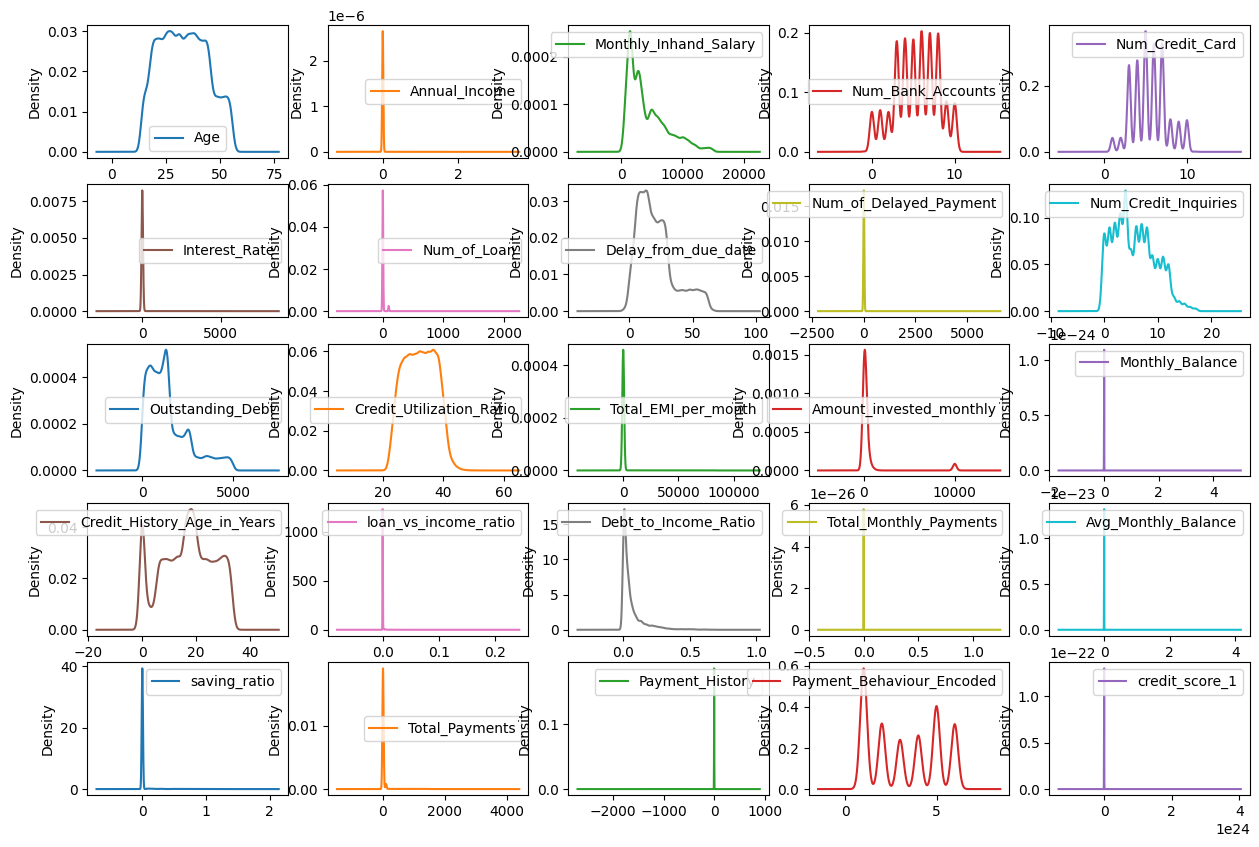

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]
df.plot(kind='density',subplots=True,layout=(5,5),sharex=False)
plt.show()

In [ ]:
df[num_columns].skew()

,0
Monthly_Inhand_Salary,1.128513
Num_Bank_Accounts,-0.190555
Num_Credit_Card,0.225830
Interest_Rate,9.006015
Delay_from_due_date,0.966395
Num_Credit_Inquiries,0.413873
Credit_Utilization_Ratio,0.028617
Total_EMI_per_month,7.102524
Monthly_Balance,1.591227


In [ ]:
df[num_columns].kurtosis()

,0
Monthly_Inhand_Salary,0.616608
Num_Bank_Accounts,-0.690257
Num_Credit_Card,-0.326917
Interest_Rate,85.182475
Delay_from_due_date,0.348294
Num_Credit_Inquiries,-0.616417
Credit_Utilization_Ratio,-0.944023
Total_EMI_per_month,52.220309
Monthly_Balance,2.943564


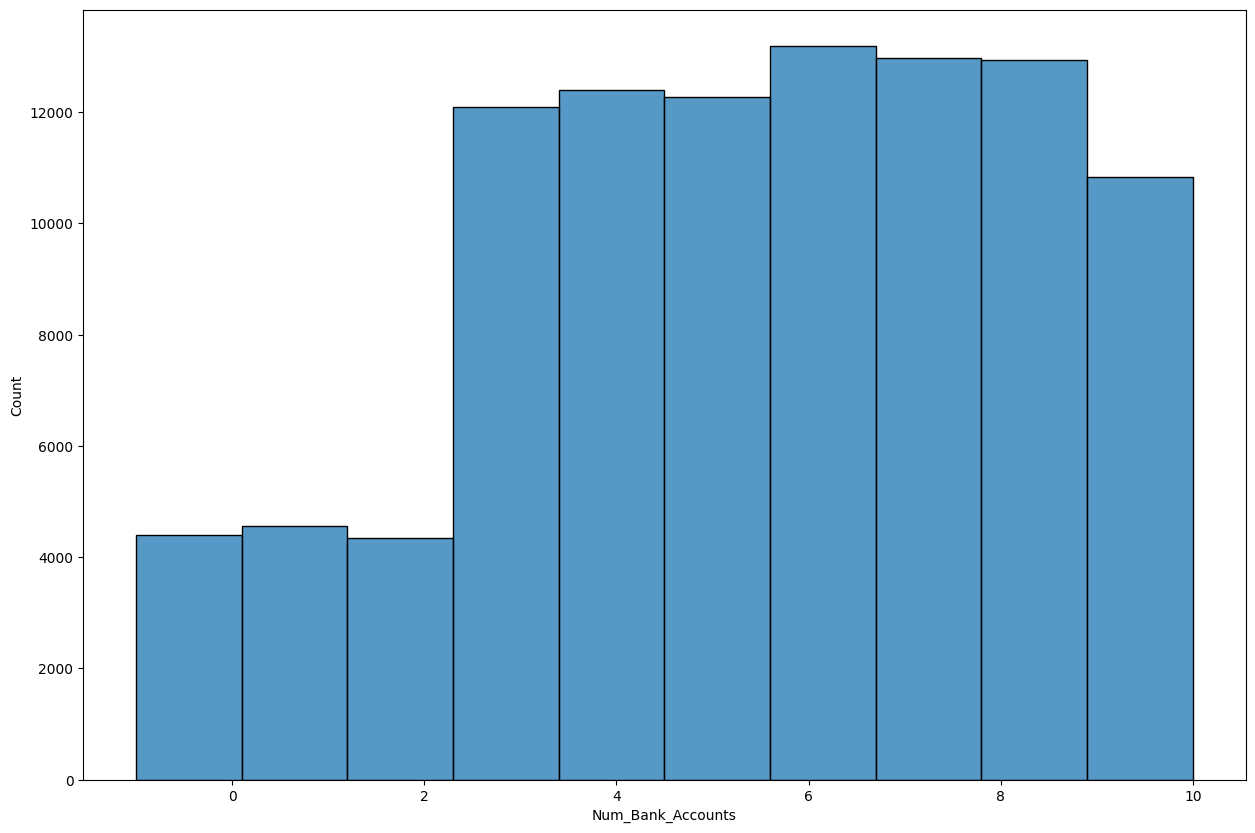

In [ ]:
sns.histplot(data=df, x = 'Num_Bank_Accounts',bins=10)
plt.show()

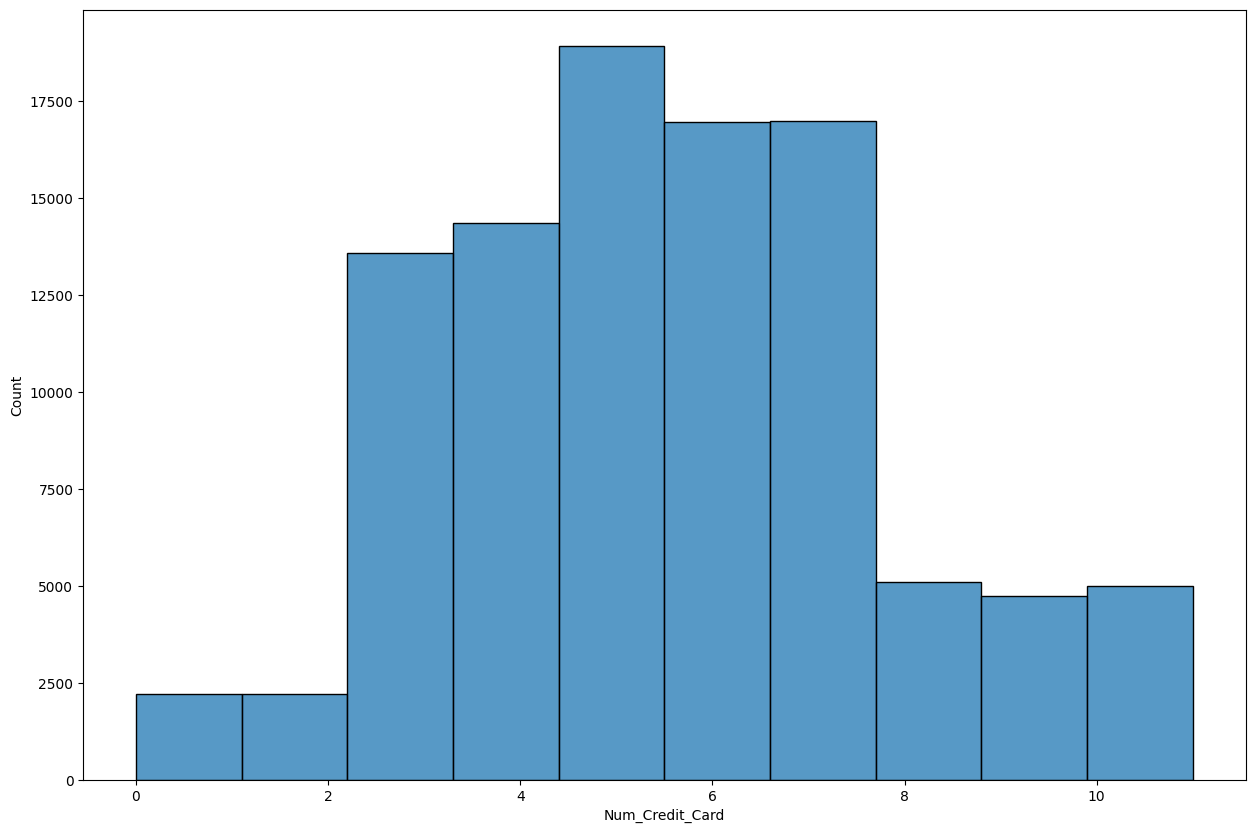

In [ ]:
sns.histplot(data=df, x = 'Num_Credit_Card',bins=10)
plt.show()

In [ ]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

df['loan_vs_income_ratio'] = df['Num_of_Loan'] / df['Annual_Income']

In [ ]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

In [ ]:
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

df['Total_Monthly_Payments'] = df['Total_EMI_per_month'] + (df['Monthly_Balance'] * df['Interest_Rate'])

In [ ]:
df['Avg_Monthly_Balance'] = df['Monthly_Balance'] / 12

In [ ]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

df['saving_ratio'] = df['Amount_invested_monthly'] / df['Annual_Income']

In [ ]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

df['Total_Payments'] = df['Num_of_Loan'] + df['Num_Bank_Accounts'] + df['Num_Credit_Card']
df['Payment_History'] = 1 - (df['Num_of_Delayed_Payment'] / df['Total_Payments'])

In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', 'Not Specified',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
df['Payment_Behaviour'].replace('!@9#%8','NA',inplace=True)

In [ ]:
payment_behaviour_mapping = {
    'NA':0,
    'Low_spent_Small_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'High_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6
}
df['Payment_Behaviour_Encoded'] = df['Payment_Behaviour'].map(payment_behaviour_mapping)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Monthly_Balance,Credit_History_Age_in_Years,loan_vs_income_ratio,Debt_to_Income_Ratio,Total_Monthly_Payments,Avg_Monthly_Balance,saving_ratio,Total_Payments,Payment_History,Payment_Behaviour_Encoded
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,312.494089,22.083333,0.000209,0.042376,987.057215,26.041174,0.004207,11,0.363636,4.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,284.629163,0.000000,0.000209,0.042376,903.462437,23.719097,0.006188,11,1.000000,3.0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,331.209863,22.250000,0.000209,0.042376,1043.204538,27.600822,0.004274,11,0.363636,2.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,223.451310,22.333333,0.000209,0.042376,719.928878,18.620942,0.010435,11,0.636364,1.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,341.489231,22.416667,0.000209,0.042376,1074.042642,28.457436,0.002167,11,1.000000,5.0


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Monthly_Balance,Credit_History_Age_in_Years,loan_vs_income_ratio,Debt_to_Income_Ratio,Total_Monthly_Payments,Avg_Monthly_Balance,saving_ratio,Total_Payments,Payment_History,Payment_Behaviour_Encoded
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,312.494089,22.083333,0.000209,0.042376,987.057215,26.041174,0.004207,11,0.363636,4.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,284.629163,0.000000,0.000209,0.042376,903.462437,23.719097,0.006188,11,1.000000,3.0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,331.209863,22.250000,0.000209,0.042376,1043.204538,27.600822,0.004274,11,0.363636,2.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,223.451310,22.333333,0.000209,0.042376,719.928878,18.620942,0.010435,11,0.636364,1.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,341.489231,22.416667,0.000209,0.042376,1074.042642,28.457436,0.002167,11,1.000000,5.0


In [ ]:
def calculate_credit_score(Credit_History_Age_in_Years, Debt_to_Income_Ratio,
                           Total_Monthly_Payments, Avg_Monthly_Balance, saving_ratio,
                           Total_Payments, Payment_History, Payment_Behaviour_Encoded):

    # Define weights for each feature (adjust as needed based on importance)
    weights = {
       'Credit_History_Age_in_Years': 0.20,
        'Debt_to_Income_Ratio': -0.20,
        'Total_Monthly_Payments': -0.10,
        'Avg_Monthly_Balance': 0.15,
        'saving_ratio': 0.10,
        'Total_Payments': 0.05,
        'Payment_History': 0.25,
        'Payment_Behaviour_Encoded': 0.10
    }

    # Normalize or scale features if necessary

    normalized_Debt_to_Income_Ratio = min(Debt_to_Income_Ratio / 1, 1)  # Assuming max ratio of 1
    normalized_Total_Monthly_Payments = min(Total_Monthly_Payments / 10000, 1)

    # Calculate score
    score = (
        Credit_History_Age_in_Years * weights['Credit_History_Age_in_Years'] +
        normalized_Debt_to_Income_Ratio * weights['Debt_to_Income_Ratio'] +
        normalized_Total_Monthly_Payments * weights['Total_Monthly_Payments'] +
        Avg_Monthly_Balance * weights['Avg_Monthly_Balance'] +
        saving_ratio * weights['saving_ratio'] +
        Total_Payments * weights['Total_Payments'] +
        Payment_History * weights['Payment_History'] +
        Payment_Behaviour_Encoded * weights['Payment_Behaviour_Encoded']
    )

    # Normalize the score to a range (e.g., 300-850)
    max_score = 800  # Example max score, adjust if needed
    credit_score = 300 + (score / max_score) * 550

    return credit_score

In [ ]:
def create_credit_score(df):
    # Select relevant columns
    columns = ['Credit_History_Age_in_Years', 'Debt_to_Income_Ratio',
               'Total_Monthly_Payments', 'Avg_Monthly_Balance', 'saving_ratio',
               'Total_Payments', 'Payment_History', 'Payment_Behaviour_Encoded']

    # Normalize numerical columns
    scaler = MinMaxScaler(feature_range=(0, 100))
    df[columns] = scaler.fit_transform(df[columns])

    # Assign weights (adjust these based on importance)
    weights = {
        'Credit_History_Age_in_Years': 0.15,
        'Debt_to_Income_Ratio': 0.20,
        'Total_Monthly_Payments': 0.10,
        'Avg_Monthly_Balance': 0.10,
        'saving_ratio': 0.10,
        'Total_Payments': 0.10,
        'Payment_History': 0.15,
        'Payment_Behaviour_Encoded': 0.10
    }

    # Calculate credit score
    df['credit_score'] = sum(df[col] * weights[col] for col in columns)

    # Normalize final score to 300-850 range (common credit score range)
    df['credit_score'] = (df['credit_score'] - df['credit_score'].min()) / (df['credit_score'].max() - df['credit_score'].min()) * 550 + 300

    return df['credit_score']

In [ ]:
df['credit_score_1'] = df.apply(create_credit_score, axis=1)

ValueError: Expected 2D array, got 1D array instead:
array=[2.20833333e+01 4.23760027e-02 9.87057215e+02 2.60411741e+01
 4.20711471e-03 1.10000000e+01 3.63636364e-01 4.00000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df[df['credit_score_1'] > 400]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age_in_Years,loan_vs_income_ratio,Debt_to_Income_Ratio,Total_Monthly_Payments,Avg_Monthly_Balance,saving_ratio,Total_Payments,Payment_History,Payment_Behaviour_Encoded,credit_score_1


In [ ]:
specific_customer_df = df[df['Customer_ID'] == 'CUS_0xaf61']
selected_column = specific_customer_df['Monthly_Balance']
print(selected_column)

99976    291.619866
99977    394.624913
99978    379.538292
99979    300.008498
99980    396.997157
99981    368.154976
99982    412.669312
99983    432.559318
Name: Monthly_Balance, dtype: float64
